# NLP analysis

I want to make sure that my results explain the reality of many communities receiving the services provided by MFIs. That's why I searched on the internet if there was any publication talking about the activities that they were fostering. I stumbled upon a barometer study presented every year since 2010 until 2019. 

These were available in PDF so I want to scrap them and see the words that were more used each year. In order to do this I removed every year the words that were most present so that they can't be repeated on the next one and I could achieve it by adding more stopwords to the standard list I had. I want to show the words with wordclouds as I think they're a very impactful way of summing-up these reports.

Index:

<a class="anchor" id="index"></a>

1. [2019](#1)
2. [2018](#2)
3. [2017](#3)
4. [2016](#4)
5. [2015](#5)
6. [2014](#6)
7. [2013](#7)
8. [2012](#8)
9. [2011](#9)
10. [2010](#10)

In [1]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split

%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(0, '/home/user/Documents/OYI_PC_2and3/TRABAJO/Allwomen/Projects/Final Project/csv_datasets/reduced_datasets')
from Functions_data_preprocessing_NLP import *
from Functions_EDA import *

import re
import string
import nltk

import requests
import imageio
from PIL import Image

## 1. 2019
<a class="anchor" id="1"></a>

[^Index](#index)

In [2]:
pip install PyPDF2

You should consider upgrading via the '/home/user/my-project-env/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# creating an object 
import PyPDF2
file = open(r'/home/user/Documents/OYI_PC_2and3/TRABAJO/Allwomen/Projects/Final Project/mfi_barometer/mfi_2019.pdf', 'rb')

In [4]:
# creating a pdf reader object
fileReader = PyPDF2.PdfFileReader(file)

In [5]:
# print the number of pages in pdf file
print(fileReader.numPages)

16


In [6]:
#Extracting text from all the 16 pages
num_pages = fileReader.numPages
count = 0
text = ""

In [7]:
while count < num_pages:
    pageObj = fileReader.getPage(count)
    count +=1
    text += pageObj.extractText()

In [8]:
text

'vvvvMICROFINANCE \nBAROMETER 2019IN PARTNERHIP WITH\n 10th Edition \nDespite positive transformations \nin recent years, micro˜nance \nis sometimes misunderstood or \npoorly perceived by the public \nopinion and by economists. Today, \nfor its 10th anniversary, the Micro\n-˜nance Barometer proposes to \nconsider micro˜nance as an en-tire segment of development po-licies and as a pioneering sector \nof responsible ˜nance. In order \nto understand the stakes of mi-cro˜nance, let us shed light on its \nhistory.\nWhile the emergence of micro-˜nance in the mid-2000s, led by \nNobel Peace Prize winner Mu-hammad Yunus, generated a \nwave of optimism in the world, \nthe early 2010 marked a turning \npoint. Over-indebtedness  of some \nof micro˜nance™s bene˜ciaries \nand the excessive pro˜ts gene-rated by micro˜nance institutions \n(MFIs) paved the way to waves \nof criticisms against the sector. \nThese episodes have revealed the \ndangers of an unchecked micro˜\n-nance and the impact it can 

In [9]:
# 2. split into tokens

from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

tokens = word_tokenize(text)

In [10]:
# 3. Convert to lower case

tokens = [w.lower() for w in tokens]
tokens[:10]

['vvvvmicrofinance',
 'barometer',
 '2019in',
 'partnerhip',
 'with',
 '10th',
 'edition',
 'despite',
 'positive',
 'transformations']

In [11]:
# 4. Remove punctuation from each word
# First let's prepare regex for char filtering

stripped = [word for word in tokens if word.isalpha()]
stripped[:10]

['vvvvmicrofinance',
 'barometer',
 'partnerhip',
 'with',
 'edition',
 'despite',
 'positive',
 'transformations',
 'in',
 'recent']

In [12]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['stopWord1','stopWord2']
stopwords.extend(newStopWords)

In [178]:
# 5. Filter out stop words

from nltk.corpus import stopwords

stop_words = set(stopwords.words('mfi_2018'))

words = [w for w in stripped if not w in stop_words]

print(words[:100])

['vvvvmicrofinance', 'partnerhip', 'edition', 'sometimes', 'misunderstood', 'poorly', 'perceived', 'public', 'opinion', 'economists', 'today', 'anniversary', 'proposes', 'consider', 'segment', 'pioneering', 'order', 'understand', 'stakes', 'let', 'shed', 'light', 'history', 'emergence', 'led', 'nobel', 'peace', 'prize', 'winner', 'yunus', 'generated', 'wave', 'optimism', 'marked', 'turning', 'excessive', 'paved', 'waves', 'criticisms', 'episodes', 'revealed', 'dangers', 'unchecked', 'managed', 'responsibly', 'measures', 'since', 'ameliorated', 'demonstrating', 'willingness', 'professionalise', 'within', 'following', 'entered', 'phase', 'professionalisation', 'institu', 'strengthening', 'broken', 'increasing', 'innovative', 'adoption', 'sdgs', 'also', 'health', 'energy', 'barometers', 'focused', 'honestly', 'ana', 'seemed', 'editions', 'instead', 'present', 'pioneer', 'variety', 'crucial', 'lessons', 'teach', 'players', 'fact', 'longer', 'monopoly', 'im', 'bad', 'news', 'contrary', 'eff

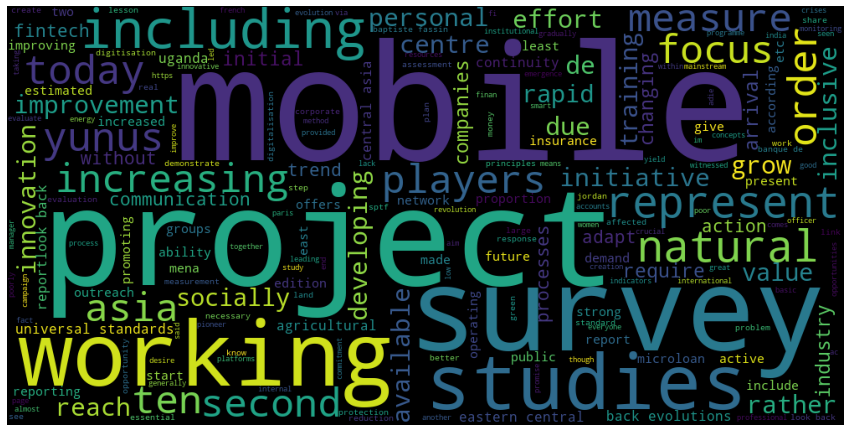

In [179]:
#convert list to string and generate wordcloud

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

unique_string=(" ").join(words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("mfi_2019.png", bbox_inches='tight')
plt.show()
plt.close()

## 2. 2018
<a class="anchor" id="2"></a>

[^Index](#index)

In [18]:
file = open(r'/home/user/Documents/OYI_PC_2and3/TRABAJO/Allwomen/Projects/Final Project/mfi_barometer/mfi_2018.pdf', 'rb')
fileReader = PyPDF2.PdfFileReader(file)

In [19]:
print(fileReader.numPages)

16


In [20]:
num_pages = fileReader.numPages
count = 0
text = ""

In [21]:
while count < num_pages:
    pageObj = fileReader.getPage(count)
    count +=1
    text += pageObj.extractText()

In [22]:
text

'vvvvMICROFINANCE \nBAROMETER 2018IN PARTNERHIP WITH\n 9th Edition \nPro˜tability: though essential  to mi-cro˜nance, this concept is complex \nto grasp in a sector that holds so-cial impact as its rationale. Should \nmicro˜nance be pro˜table? If so, \ncan it be socially responsible? Can \nit remain true to its aspirations and \ncontribute, through ˜nancial inclu\n-sion, to lift nearly 2 billion people \nwithout access to banking services \nout of poverty? Between reaso-nable interest rates and suf˜cient \npro˜tability, what is the proper ba\n-lance for Micro˜nance Institutions \n(MFIs)? What resources to ˜nance \nthe development of the micro˜-nance sector?Financial sustainability is important: \nto ful˜l their mission and develop \ntheir services to customers while \nensuring their economic viability, \nplayers in the sector must not only \ncover their costs, but also gene-rate pro˜ts. Pro˜tability, however, \ncannot be reduced to its ˜nancial \ndimension. On the contrary, it is \nnec

In [23]:
tokens = word_tokenize(text)

In [24]:
tokens = [w.lower() for w in tokens]
tokens[:10]

['vvvvmicrofinance',
 'barometer',
 '2018in',
 'partnerhip',
 'with',
 '9th',
 'edition',
 'pro˜tability',
 ':',
 'though']

In [170]:
stop_words = set(stopwords.words('mfi_2017'))

words = [w for w in stripped if not w in stop_words]

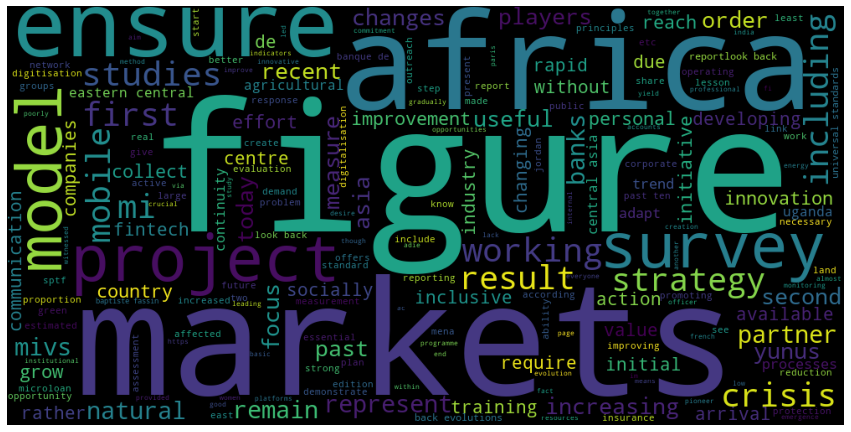

In [171]:
unique_string=(" ").join(words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("mfi_2018.png", bbox_inches='tight')
plt.show()
plt.close()

## 3. 2017
<a class="anchor" id="3"></a>

[^Index](#index)

In [28]:
file = open(r'/home/user/Documents/OYI_PC_2and3/TRABAJO/Allwomen/Projects/Final Project/mfi_barometer/mfi_2017.pdf', 'rb')
fileReader = PyPDF2.PdfFileReader(file)

In [29]:
print(fileReader.numPages)

16


In [30]:
num_pages = fileReader.numPages
count = 0
text = ""

In [31]:
while count < num_pages:
    pageObj = fileReader.getPage(count)
    count +=1
    text += pageObj.extractText()

In [32]:
text

'MICROFINANCE \nBAROMETER 2017\nIN PARTNERSHIP WITH\n 8th Edition \nCONTENT                   \nPAGES 2-3\nKEY FIGURES OF FINANCIAL\nINCLUSION IN THE WORLD\nPAGE 4-5\nKEY FIGURES OF FINANCIAL\n\nINCLUSION IN THE WORLD IN EUROPE\nPAGES 6-7\nKEY FIGURES OF FINANCIAL\n\nINCLUSION IN \nFRANCEPAGES 8-9SOCIAL PERFORMANCE\nPAGES 10-16\nSPECIAL REPORT ﬁ\nMICROFINANCE & \nIMPACT INVESTINGﬂ\nIS MICROFINANCE STILL WORKING?\nEDITORIALJean-Luc PerronVice-Chairman, Convergences& Advisor, Yunus Centre\nI˜t is not easy to report on the \nstate of micro˚nance around \n\nthe world, given that specialised \ninstitutions are diverse in their legal \n\nnature, size and business model, as \n\nwell as the services they provide and \n\nthe context in which they operate. \nConvergences™ Micro˚nance Ba-rometer has the great merit of fol-lowing, year after year, the progress \n\nof the sector, identifying trends and \n\nfostering debate. We would like to \n\nthank all the contributors to this 8th \nedition.This 

In [33]:
tokens = word_tokenize(text)

In [34]:
tokens = [w.lower() for w in tokens]
tokens[:10]

['microfinance',
 'barometer',
 '2017',
 'in',
 'partnership',
 'with',
 '8th',
 'edition',
 'content',
 'pages']

In [168]:
stop_words = set(stopwords.words('mfi_2016'))

words = [w for w in stripped if not w in stop_words]

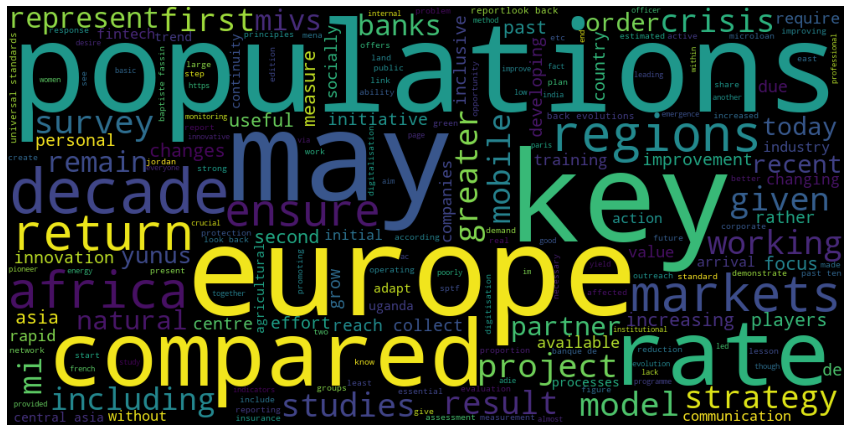

In [169]:
unique_string=(" ").join(words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("mfi_2017.png", bbox_inches='tight')
plt.show()
plt.close()

## 4. 2016
<a class="anchor" id="4"></a>

[^Index](#index)

In [38]:
file = open(r'/home/user/Documents/OYI_PC_2and3/TRABAJO/Allwomen/Projects/Final Project/mfi_barometer/mfi_2016.pdf', 'rb')
fileReader = PyPDF2.PdfFileReader(file)

In [39]:
print(fileReader.numPages)

12


In [40]:
num_pages = fileReader.numPages
count = 0
text = ""

In [41]:
while count < num_pages:
    pageObj = fileReader.getPage(count)
    count +=1
    text += pageObj.extractText()

In [42]:
text

"IntroductionPages 2-3\nKey figures of \n financial inclusionPage 4\nSocial performance\n Pages 5-9  Special report \n Microfinance and SDGs\nPage 10\nMicrofinance in France \nand Europe\n Page 12\nInterview of \nMuhammad Yunus\nContentMICROFINANCEBAROMETER 2016\n7th Edition˜˚˛˝˚˙ˆˇ\n\n\n\n\nˆ\n˘ˆˇ\n\n\n\n\nˆ\n˘ˇ˙\n\n\n˘\n\nˇˆ\n\n\n\n\n\n˘ˆ\n\n˚˘ˆˇ\n˝˘˜ˆˇ\n\nFor queries on usage, contact: dpicampaigns@un.org\nDeveloped in collaboration with| TheGlobalGoals@trollback.com | +1.212.529.1010\nSUSTAINABLE DEVELOPMENT GOALS: WHAT ARE THE STAKES FOR MICROFINANCE? In 2015, the Addis Ababa Conference \non the financing of development, \nthe adoption of the 17 Sustainable \nDevelopment Goals (SDGs) by the \nUnited Nations General Assembly, and \nthe Paris Agreement on climate change, were \nthe highlights of a remarkable diplomatic \nsequence that set the course for the next \n15 years for a responsible, coordinated \nand inclusive development. Convergences \nsummarises this course in a mobilisi

In [43]:
tokens = word_tokenize(text)

In [44]:
tokens = [w.lower() for w in tokens]
tokens[:10]

['introductionpages',
 '2-3',
 'key',
 'figures',
 'of',
 'financial',
 'inclusionpage',
 '4',
 'social',
 'performance']

In [164]:
stop_words = set(stopwords.words('mfi_2015'))

words = [w for w in stripped if not w in stop_words]

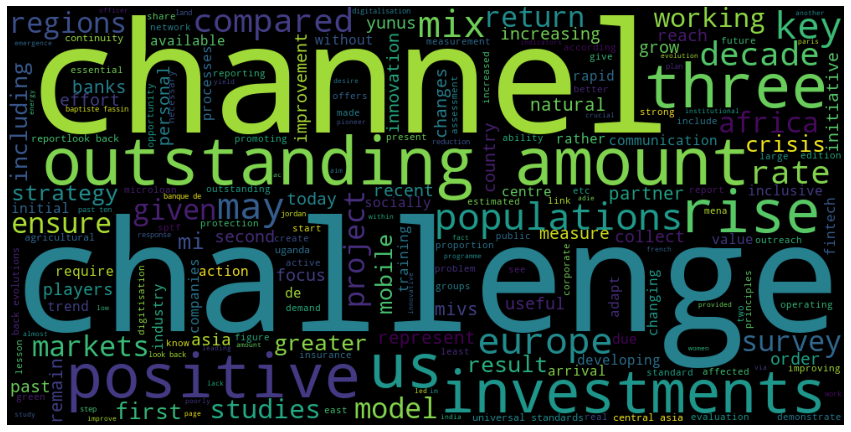

In [165]:
unique_string=(" ").join(words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("mfi_2016.png", bbox_inches='tight')
plt.show()
plt.close()

## 5. 2015
<a class="anchor" id="5"></a>

[^Index](#index)

In [48]:
file = open(r'/home/user/Documents/OYI_PC_2and3/TRABAJO/Allwomen/Projects/Final Project/mfi_barometer/mfi_2015.pdf', 'rb')
fileReader = PyPDF2.PdfFileReader(file)

In [49]:
print(fileReader.numPages)

12


In [50]:
num_pages = fileReader.numPages
count = 0
text = ""

In [51]:
while count < num_pages:
    pageObj = fileReader.getPage(count)
    count +=1
    text += pageObj.extractText()

In [52]:
text

'The new Global Findex survey \nrecently brought to light the \n\nsignificant progress made \ntowards financial inclusion \nworldwide, with 700 million \nadults newly ﬁbankedﬂ in the last 5 \n\nyears. Microfinance has played an \nimportant role in this change and \ndata from the MIX Market confirm the \n\ncontinued growth of the sector, with an \n\nannual increase in borrowers of nearly \n\n10% in 2014 (see pp. 2 and 3).\nThe progress of financial inclusion \nis also a result of the surge of digital \n\nfinance. This phenomenon is the focus \n\nof the special report of this 2015 \n\nedition.Digital finance has a major impact \non financial institutions. The arrival \n\nof new players (telecommunications \n\noperators), the creation of new \ndistribution models (networks of \nexternal agents, banks without \n\nbranches...), the appearance of new \n\nopportunities in relation to client \naccess and back-office management, \nare just some of the challenges \n\nthat microfinance has overco

In [53]:
tokens = word_tokenize(text)

In [54]:
tokens = [w.lower() for w in tokens]
tokens[:10]

['the',
 'new',
 'global',
 'findex',
 'survey',
 'recently',
 'brought',
 'to',
 'light',
 'the']

In [162]:
stop_words = set(stopwords.words('mfi_2014'))

words = [w for w in stripped if not w in stop_words]

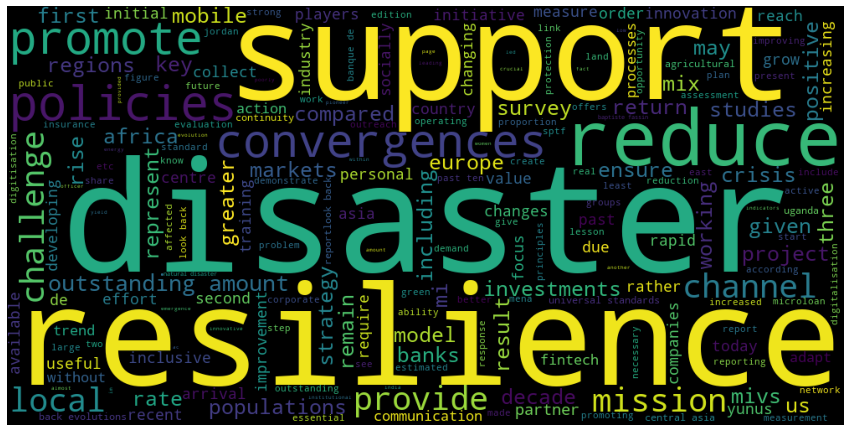

In [163]:
unique_string=(" ").join(words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("mfi_2015.png", bbox_inches='tight')
plt.show()
plt.close()

## 6. 2014
<a class="anchor" id="6"></a>

[^Index](#index)

In [58]:
file = open(r'/home/user/Documents/OYI_PC_2and3/TRABAJO/Allwomen/Projects/Final Project/mfi_barometer/mfi_2014.pdf', 'rb')
fileReader = PyPDF2.PdfFileReader(file)

In [59]:
print(fileReader.numPages)

12


In [60]:
num_pages = fileReader.numPages
count = 0
text = ""

In [61]:
while count < num_pages:
    pageObj = fileReader.getPage(count)
    count +=1
    text += pageObj.extractText()

In [62]:
text

'5th edition \nMicrofinance continues \nto develop with USD \n81.5 billion in loans \ngranted worldwide \nand a 5% increase in \nthe number of customers in 20121 (see data on pp.2-3). However, this \nis a fast-changing sector. Services, \nstakeholders, regulation, and \ntechnological innovations evolve \nand transform the landscape of \nthe microfinance of tomorrow. The \nobjective: to remain an alternative for \nmore than 2.5 billion people currently \nexcluded from the traditional banking \nsystem across the globe. \nThe sector provides a greater diversity \nof banking, financial, and insurance \nproducts, offered by a greater range \nof actors. Thus, conventional banks, \nmobile operators, and distribution \nchains complement the services \nmade available by microfinance \ninstitutions. Technological innovation \nis also a key tool for the development \nof microfinance (see articles on \npp.5-8). This evolution process is \naccompanied by a convergence of \npractices and prudential 

In [63]:
tokens = word_tokenize(text)

In [64]:
tokens = [w.lower() for w in tokens]
tokens[:10]

['5th',
 'edition',
 'microfinance',
 'continues',
 'to',
 'develop',
 'with',
 'usd',
 '81.5',
 'billion']

In [158]:
stop_words = set(stopwords.words('mfi_2013'))

words = [w for w in stripped if not w in stop_words]

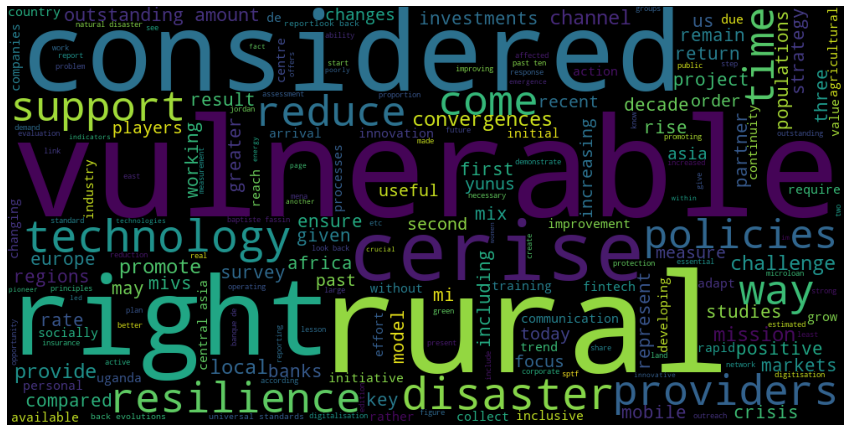

In [159]:
unique_string=(" ").join(words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("mfi_2014.png", bbox_inches='tight')
plt.show()
plt.close()

## 7. 2013
<a class="anchor" id="7"></a>

[^Index](#index)

In [69]:
file = open(r'/home/user/Documents/OYI_PC_2and3/TRABAJO/Allwomen/Projects/Final Project/mfi_barometer/mfi_2013.pdf', 'rb')
fileReader = PyPDF2.PdfFileReader(file)

In [70]:
print(fileReader.numPages)

12


In [71]:
num_pages = fileReader.numPages
count = 0
text = ""

In [72]:
while count < num_pages:
    pageObj = fileReader.getPage(count)
    count +=1
    text += pageObj.extractText()

In [73]:
text

'MICROFINANCEBAROMETER 20134th Edition  \nWith approximately 2.5 \nbillion adults lacking a \nformal bank account, \nthere is a long way \nto go to achieve \nfinancial inclusion. Microfinance \ncan play a significant role, through \nresponsible and innovative practices \nthat have a positive and sustainable \nsocioeconomic impact on clients.\nAfter the repayment crises on all \ncontinents in 2008/2010, sector \ngrowth has been slowing down, and \nglobal outreach has slightly declined. \nHowever, over 90 million borrowers \nwere still reached globally in 2011, \nmost of whom being women, and \nimportant growth rates were observed \nin some regions (see data on pages \n2 and 3).\nAt the same time, the microfinance \nindustry has grown aware of its \nresponsibility to ensure that the \naccess to financial services it provides \ndoes not harm clients. To that \naim, worldwide initiatives involving \noperators, investors, regulators \nand service providers have led to \nthe creation of new 

In [74]:
tokens = word_tokenize(text)

In [75]:
tokens = [w.lower() for w in tokens]
tokens[:10]

['microfinancebarometer',
 '20134th',
 'edition',
 'with',
 'approximately',
 '2.5',
 'billion',
 'adults',
 'lacking',
 'a']

In [156]:
stop_words = set(stopwords.words('mfi_2012'))

words = [w for w in stripped if not w in stop_words]

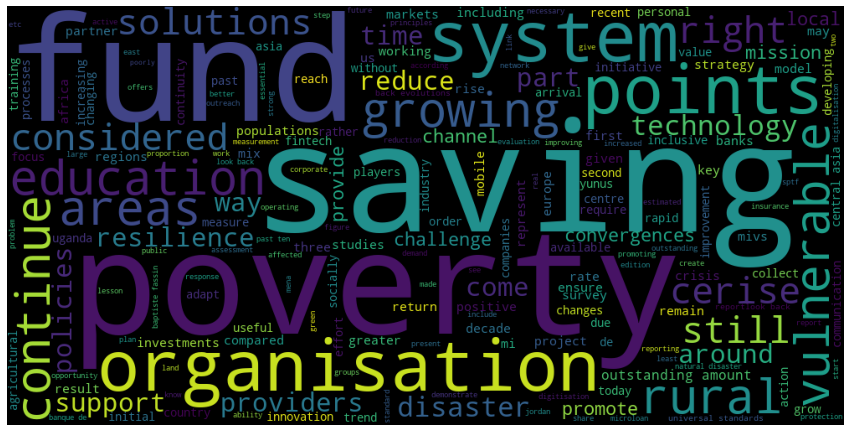

In [157]:
unique_string=(" ").join(words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("mfi_2013.png", bbox_inches='tight')
plt.show()
plt.close()

## 8. 2012
<a class="anchor" id="8"></a>

[^Index](#index)

In [90]:
file = open(r'/home/user/Documents/OYI_PC_2and3/TRABAJO/Allwomen/Projects/Final Project/mfi_barometer/mfi_2012.pdf', 'rb')
fileReader = PyPDF2.PdfFileReader(file)

In [91]:
print(fileReader.numPages)

12


In [92]:
num_pages = fileReader.numPages
count = 0
text = ""

In [93]:
while count < num_pages:
    pageObj = fileReader.getPage(count)
    count +=1
    text += pageObj.extractText()

In [94]:
text

"Subjected to considerable \nmedia coverage, the \n\ncrises of the microfinance \n\nsector have disclosed the \n\nmission drift of certain \nactors, such as aggressive business \n\npractices, prohibitive interest rates... \n\nMost importantly, these crises Œ \n\nalong with the over indebtedness \n\nwhich often accompanies them Œ \n\nhave shown the inherent weaknesses \n\nof this relatively recent sector. \n\nFor several years, the sector has \nexperienced various changes as well \n\nas an important growth for which it \n\nmust adapt its methods, structures \n\nand regulation. Professionals agree \n\non the fact that these localized \ncrises do not bring into question the \nrole of microfinance as a tool for \ndevelopment but call for changes \n\nin the practices of microfinance \n\ninstitutions (MFIs) and of the \nother actors involved (investors, \n\nregulators–). Along the lines of the \n\n2011 Microfinance Barometer, which \npresented a special report « For a \n\nreturn to more soci

In [96]:
tokens = word_tokenize(text)

In [97]:
tokens = [w.lower() for w in tokens]
tokens[:10]

['subjected',
 'to',
 'considerable',
 'media',
 'coverage',
 ',',
 'the',
 'crises',
 'of',
 'the']

In [142]:
stop_words = set(stopwords.words('mfi_2011'))

words = [w for w in stripped if not w in stop_words]

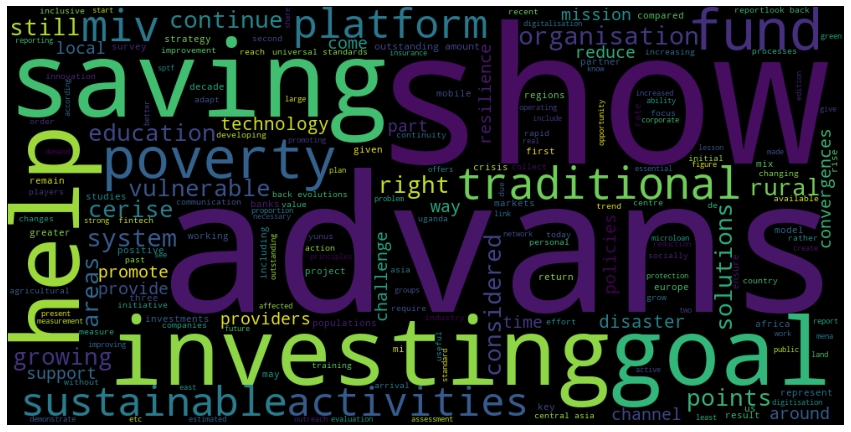

In [143]:
unique_string=(" ").join(words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("mfi_2012.png", bbox_inches='tight')
plt.show()
plt.close()

## 9. 2011
<a class="anchor" id="9"></a>

[^Index](#index)

In [100]:
file = open(r'/home/user/Documents/OYI_PC_2and3/TRABAJO/Allwomen/Projects/Final Project/mfi_barometer/mfi_2011.pdf', 'rb')
fileReader = PyPDF2.PdfFileReader(file)

In [101]:
print(fileReader.numPages)

12


In [102]:
num_pages = fileReader.numPages
count = 0
text = ""

In [103]:
while count < num_pages:
    pageObj = fileReader.getPage(count)
    count +=1
    text += pageObj.extractText()

In [104]:
text

' «Microcredit, mira-cle or disaster?ﬂ, \nﬁMicrofinance in cri-\nsisﬂ, ﬁMicrocredit \n\nturns to tragedyﬂ– \nFor several months, successive arti\n-\ncles denouncing the escalation of \n\nmicrofinance in certain countries \n\nhave been accumulating in French \n\nand international press. From exces\n-sive debt to overly high interest rates \nand reports of violence towards credit \n\nagents, microfinance has entered \n\na phase of turmoil. Such criticisms \n\nare in contrast with the sector™s \n\nlong-lasting optimism, which usually \npresents microcredit as a miracle \nsolution to poverty, embodied by the \n\nNobel Peace Prize recipient Professor \n\nMuhammad Yunus and the Grameen \n\nBank in 2006. Between idealism and \n\nexcessive criticism, this year, the \nBarometer of Microfinance presents \n\na special report aimed at clarifying \n\nthe current situation of microfinance \n\nand the responses that microfinance \n\nactors are putting together to facilitate \na greater social impact.

In [105]:
tokens = word_tokenize(text)

In [106]:
tokens = [w.lower() for w in tokens]
tokens[:10]

['«',
 'microcredit',
 ',',
 'mira-cle',
 'or',
 'disaster',
 '?',
 'ﬂ',
 ',',
 'ﬁmicrofinance']

In [136]:
stop_words = set(stopwords.words('mfi_2010'))

words = [w for w in stripped if not w in stop_words]

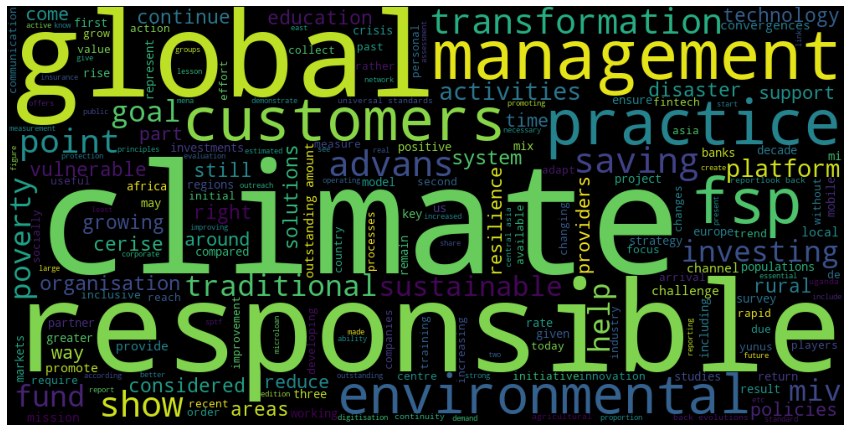

In [137]:
unique_string=(" ").join(words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("mfi_2011.png", bbox_inches='tight')
plt.show()
plt.close()

## 10. 2010
<a class="anchor" id="10"></a>

[^Index](#index)

In [109]:
file = open(r'/home/user/Documents/OYI_PC_2and3/TRABAJO/Allwomen/Projects/Final Project/mfi_barometer/mfi_2011.pdf', 'rb')
fileReader = PyPDF2.PdfFileReader(file)

In [110]:
print(fileReader.numPages)

12


In [111]:
num_pages = fileReader.numPages
count = 0
text = ""

In [112]:
while count < num_pages:
    pageObj = fileReader.getPage(count)
    count +=1
    text += pageObj.extractText()

In [113]:
text

' «Microcredit, mira-cle or disaster?ﬂ, \nﬁMicrofinance in cri-\nsisﬂ, ﬁMicrocredit \n\nturns to tragedyﬂ– \nFor several months, successive arti\n-\ncles denouncing the escalation of \n\nmicrofinance in certain countries \n\nhave been accumulating in French \n\nand international press. From exces\n-sive debt to overly high interest rates \nand reports of violence towards credit \n\nagents, microfinance has entered \n\na phase of turmoil. Such criticisms \n\nare in contrast with the sector™s \n\nlong-lasting optimism, which usually \npresents microcredit as a miracle \nsolution to poverty, embodied by the \n\nNobel Peace Prize recipient Professor \n\nMuhammad Yunus and the Grameen \n\nBank in 2006. Between idealism and \n\nexcessive criticism, this year, the \nBarometer of Microfinance presents \n\na special report aimed at clarifying \n\nthe current situation of microfinance \n\nand the responses that microfinance \n\nactors are putting together to facilitate \na greater social impact.

In [118]:
#Let's try to translate the text into English

In [117]:
pip install googletrans

     |████████████████████████████████| 55 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 912 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.3 MB/s  eta 0:00:01
     |████████████████████████████████| 53 kB 895 kB/s eta 0:00:01
     |████████████████████████████████| 65 kB 1.6 MB/s eta 0:00:01     |█████████████████████████▏      | 51 kB 1.7 MB/s eta 0:00:01
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15734 sha256=45fac1beba78ff0933e27d307fc2f5b55df6ce6e5679f75f70f7c2aa5b889d48
  Stored in directory: /home/user/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans
You should consider upgrading via the '/home/user/my-project-env/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [120]:
from googletrans import Translator, constants
from pprint import pprint

translator = Translator()

In [122]:
# translate a spanish text to english text (by default)
translation = translator.translate(text)
print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")

 «Microcredit, mira-cle or disaster?ﬂ, 
ﬁMicrofinance in cri-
sisﬂ, ﬁMicrocredit 

turns to tragedyﬂ– 
For several months, successive arti
-
cles denouncing the escalation of 

microfinance in certain countries 

have been accumulating in French 

and international press. From exces
-sive debt to overly high interest rates 
and reports of violence towards credit 

agents, microfinance has entered 

a phase of turmoil. Such criticisms 

are in contrast with the sector™s 

long-lasting optimism, which usually 
presents microcredit as a miracle 
solution to poverty, embodied by the 

Nobel Peace Prize recipient Professor 

Muhammad Yunus and the Grameen 

Bank in 2006. Between idealism and 

excessive criticism, this year, the 
Barometer of Microfinance presents 

a special report aimed at clarifying 

the current situation of microfinance 

and the responses that microfinance 

actors are putting together to facilitate 
a greater social impact. These answers 
include labeling, social per

In [126]:
print(translation.text)

 «Microcredit, mira-cle or disaster?ﬂ, 
ﬁMicrofinance in cri-
sisﬂ, ﬁMicrocredit 

turns to tragedyﬂ– 
For several months, successive arti
-
cles denouncing the escalation of 

microfinance in certain countries 

have been accumulating in French 

and international press. From exces
-sive debt to overly high interest rates 
and reports of violence towards credit 

agents, microfinance has entered 

a phase of turmoil. Such criticisms 

are in contrast with the sector™s 

long-lasting optimism, which usually 
presents microcredit as a miracle 
solution to poverty, embodied by the 

Nobel Peace Prize recipient Professor 

Muhammad Yunus and the Grameen 

Bank in 2006. Between idealism and 

excessive criticism, this year, the 
Barometer of Microfinance presents 

a special report aimed at clarifying 

the current situation of microfinance 

and the responses that microfinance 

actors are putting together to facilitate 
a greater social impact. These answers 
include labeling, social per

In [128]:
tokens = word_tokenize(translation.text)

In [129]:
tokens = [w.lower() for w in tokens]
tokens[:10]

['«',
 'microcredit',
 ',',
 'mira-cle',
 'or',
 'disaster',
 '?',
 'ﬂ',
 ',',
 'ﬁmicrofinance']

In [130]:
stop_words = set(stopwords.words('mfi'))

words = [w for w in stripped if not w in stop_words]

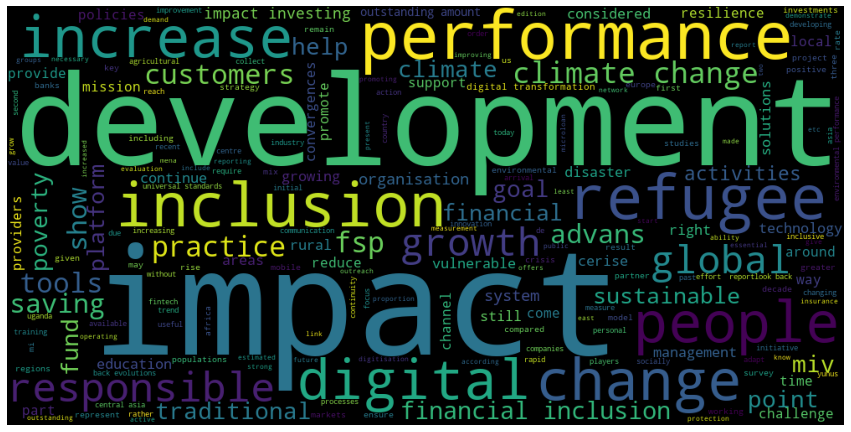

In [131]:
unique_string=(" ").join(words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("mfi_2011.png", bbox_inches='tight')
plt.show()
plt.close()